# <center> 🎤 Emotion Recognition with RAVDESS, EmoDB & TESS </center>

---

## 🧠 **Speech Emotion Recognition (SER)**
### Combining **EmoDB** and **RAVDESS** and **Tess** Datasets for Robust Emotion Analysis

🎯 **Objective:**  Build a robust and accurate Speech Emotion Recognition (SER) system by leveraging the strengths of multiple high-quality datasets to improve emotion classification from speech audio.

---

## 🌟 **Project Overview**
This project integrates two widely recognized datasets for speech emotion recognition:

- 🎙 **EmoDB**: Berlin Database of Emotional Speech, featuring German speech samples labeled with emotions.
- 🎼 **RAVDESS**: Ryerson Audio-Visual Database of Emotional Speech and Song, consisting of North American English speech and song recordings.
- 🎙 **TESS**:  Includes audio recordings by two actresses simulating emotions while speaking a standard set of English sentences.

By combining these datasets, we aim to enhance model performance, ensuring better generalization across different speech samples.

---

## 📊 **Emotion Labels Comparison**

| Dataset  | Emotion Labels                                  |
|----------|-----------------------------------------------|
| **EmoDB** | Neutral, Boredom, Happy, Sad, Angry, Fear, Disgust |
| **RAVDESS** | Neutral, Calm, Happy, Sad, Angry, Fearful, Disgust, Surprised |
| **TESS** | Angry, Disgust, Fear, Happy, Neutral, Pleasant Surprise, Sad |


### 🔹 **Detailed Emotion Mapping:**
#### 📌 **EmoDB Emotion Labels:**
- 😠 **Anger** (Ärger - Wut)
- 😴 **Boredom** (Langeweile)
- 🤢 **Disgust** (Ekel)
- 😨 **Fear** (Angst)
- 😃 **Happiness** (Freude)
- 😢 **Sadness** (Trauer)
- 😐 **Neutral** (Neutral version)

#### 📌 **RAVDESS Emotion Labels:**
- 😐 **Neutral** (01)
- 😌 **Calm** (02)
- 😃 **Happy** (03)
- 😢 **Sad** (04)
- 😠 **Angry** (05)
- 😨 **Fearful** (06)
- 🤢 **Disgust** (07)
- 😲 **Surprised** (08

#### 📌 **TESS:**
- 😐 **Neutral** (01)
- 😃 **Happy** (02)
- 😢 **Sad** (03)
- 😠 **Angry** (04)
- 😨 **Fear** (05)
- 🤢 **Disgust** (06)
- 😲 **Pleasant Surprised** (07)



In [1]:
!pip install --q librosa
!pip install --q mealpy

import pandas as pd
import numpy as np

import os
import sys
import tensorflow as tf
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, BatchNormalization, Dropout, Bidirectional, LSTM, Dense, Attention, Add, Flatten

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

ERROR: Could not find a version that satisfies the requirement mealpy (from versions: none)
ERROR: No matching distribution found for mealpy


2026-01-15 09:02:41.722599: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768467761.906328      24 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768467761.960462      24 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768467762.423674      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768467762.423718      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768467762.423720      24 computation_placer.cc:177] computation placer alr

#  <center> 🇩🇪 EmoDB </center>

In [2]:
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# # Define the dataset directory
# emodb_path = "/kaggle/input/berlin-database-of-emotional-speech-emodb/wav/*.wav"

# # Mapping EmoDB filename encoding to emotions
# emotion_map = {
#     'W': 'anger',
#     'L': 'boredom',
#     'E': 'disgust',
#     'A': 'fear',
#     'F': 'happiness',
#     'T': 'sadness',
#     'N': 'neutral'
# }

# # Extract emotion labels from filenames
# filenames = glob.glob(emodb_path)
# emotions = [emotion_map[os.path.basename(f)[5]] for f in filenames if os.path.basename(f)[5] in emotion_map]

# # Count occurrences of each emotion
# emotion_counts = Counter(emotions)

# # Sort emotions by predefined order
# emotion_order = ['neutral', 'disgust', 'fear', 'sadness', 'happiness', 'anger', 'boredom']
# counts = [emotion_counts[e] for e in emotion_order if e in emotion_counts]

# # Print the count of each emotion
# print("Emotion Counts:")
# for emotion in emotion_order:
#     count = emotion_counts.get(emotion, 0)  # Get the count or default to 0 if emotion is not found
#     print(f"{emotion}: {count}")

# # Plot the emotion distribution
# plt.figure(figsize=(8, 6))
# sns.barplot(x=emotion_order, y=counts, palette="colorblind")
# plt.xlabel("Emotions")
# plt.ylabel("Count")
# plt.title("Count of Emotions (EmoDB)")
# plt.show()

Emotion Counts:
angry: 127
disgust: 46
fear: 69
happy: 71
sad: 62
surprise: 0
neutral: 160


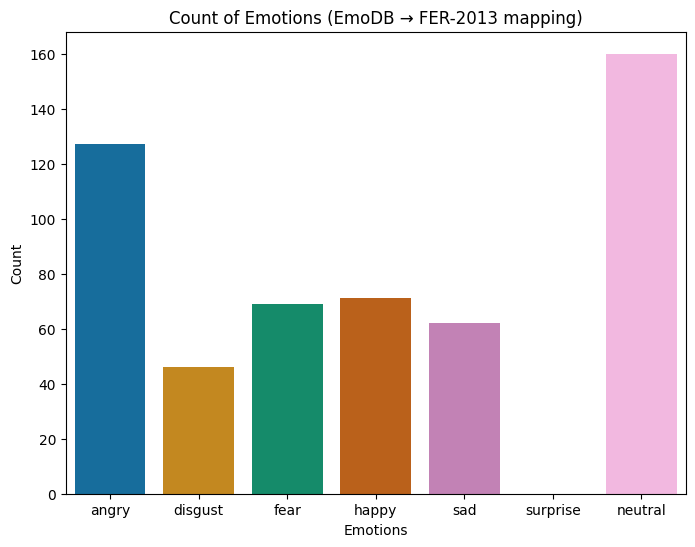

In [3]:
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Dataset path
emodb_path = "/kaggle/input/berlin-database-of-emotional-speech-emodb/wav/*.wav"

# FER-2013 aligned emotion mapping
emotion_map = {
    'W': 'angry',
    'L': 'neutral',
    'E': 'disgust',
    'A': 'fear',
    'F': 'happy',
    'T': 'sad',
    'N': 'neutral'
}

# Extract emotion labels from filenames
filenames = glob.glob(emodb_path)
emotions = [emotion_map[os.path.basename(f)[5]] for f in filenames if os.path.basename(f)[5] in emotion_map]

# Count emotions
emotion_counts = Counter(emotions)

# FER-2013 emotion order
emotion_order = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
counts = [emotion_counts.get(e, 0) for e in emotion_order]

# Print counts
print("Emotion Counts:")
for emotion in emotion_order:
    print(f"{emotion}: {emotion_counts.get(emotion, 0)}")

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=emotion_order, y=counts, palette="colorblind")
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.title("Count of Emotions (EmoDB → FER-2013 mapping)")
plt.show()


In [4]:
Emo_df = pd.DataFrame({
    'filenames': filenames,
    'emotions': emotions
})
Emo_df.head()

filenames emotions
0  /kaggle/input/berlin-database-of-emotional-spe...    happy
1  /kaggle/input/berlin-database-of-emotional-spe...    happy
2  /kaggle/input/berlin-database-of-emotional-spe...    angry
3  /kaggle/input/berlin-database-of-emotional-spe...    angry
4  /kaggle/input/berlin-database-of-emotional-spe...    angry

# <center> 🇺🇸 RAVDESS </center>

In [5]:
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Define the dataset directory
ravdess_path = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/**/*.wav"

# Mapping RAVDESS numeric encoding t#  <center> 🇩🇪 EmoDB </center>o emotions
emotion_map = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

# Extract emotion labels from filenames
filenames = glob.glob(ravdess_path, recursive=True)
emotions = [emotion_map[os.path.basename(f).split('-')[2]] for f in filenames if os.path.basename(f).split('-')[2] in emotion_map]

# Count occurrences of each emotion
emotion_counts = Counter(emotions)

# Sort emotions by predefined order
emotion_order = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
counts = [emotion_counts[e] for e in emotion_order if e in emotion_counts]

# Print the count of each emotion
print("Emotion Counts:")
for emotion in emotion_order:
    count = emotion_counts.get(emotion, 0)  # Get the count or default to 0 if emotion is not found
    print(f"{emotion}: {count}")



Emotion Counts:
neutral: 96
calm: 192
happy: 192
sad: 192
angry: 192
fearful: 192
disgust: 192
surprised: 192


Emotion Counts (FER-2013 format):
angry: 192
disgust: 192
fear: 192
happy: 192
sad: 192
surprise: 192
neutral: 288


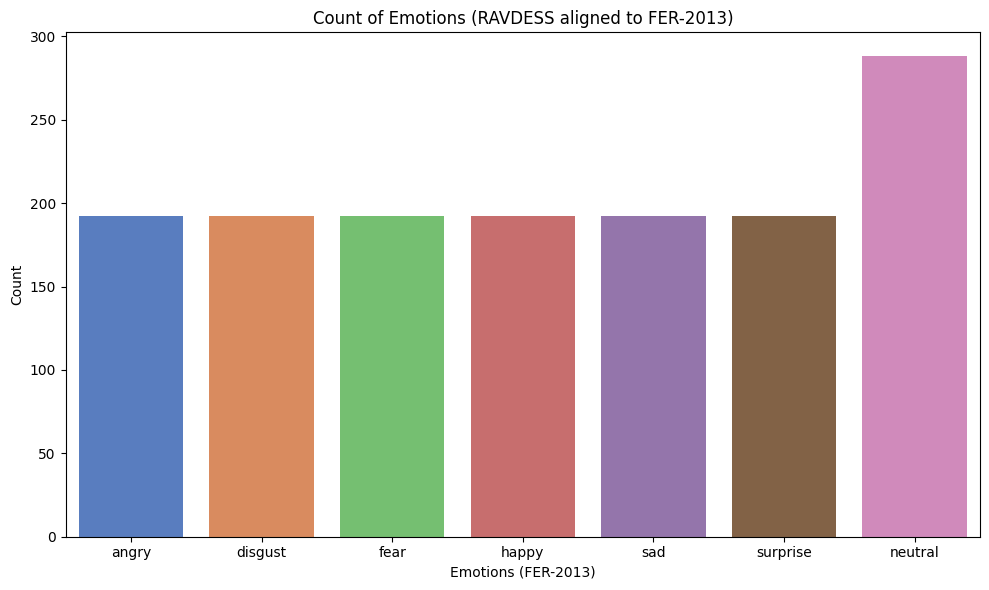

In [6]:
import pandas as pd

# FER-2013 compatible mapping
fer_compatible_map = {
    "angry": "angry",
    "disgust": "disgust",
    "fearful": "fear",
    "happy": "happy",
    "sad": "sad",
    "surprised": "surprise",
    "neutral": "neutral",
    "calm": "neutral"  # merge calm into neutral
}

# Apply FER-2013 emotion mapping
fer_emotions = [fer_compatible_map[e] for e in emotions]

# Recount with FER-2013 mapped emotions
fer_emotion_counts = Counter(fer_emotions)

# FER-2013 emotion order
fer_emotion_order = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
fer_counts = [fer_emotion_counts.get(e, 0) for e in fer_emotion_order]

# Print the new counts
print("Emotion Counts (FER-2013 format):")
for emotion in fer_emotion_order:
    print(f"{emotion}: {fer_emotion_counts.get(emotion, 0)}")

# Plot FER-compatible emotion distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=fer_emotion_order, y=fer_counts, palette="muted")
plt.xlabel("Emotions (FER-2013)")
plt.ylabel("Count")
plt.title("Count of Emotions (RAVDESS aligned to FER-2013)")
plt.tight_layout()
plt.show()

# Optional: Create DataFrame for further use (like merging)
ravdess_df = pd.DataFrame({
    'filenames': filenames,
    'emotions': fer_emotions
})


In [7]:
Ravdess_df = pd.DataFrame({
    'filenames': filenames,
    'emotions': emotions
})
Ravdess_df.head()

filenames   emotions
0  /kaggle/input/ravdess-emotional-speech-audio/a...  surprised
1  /kaggle/input/ravdess-emotional-speech-audio/a...    neutral
2  /kaggle/input/ravdess-emotional-speech-audio/a...    disgust
3  /kaggle/input/ravdess-emotional-speech-audio/a...    disgust
4  /kaggle/input/ravdess-emotional-speech-audio/a...    neutral

#  <center> TESS </center>

In [8]:
# # Remap TESS emotions to FER-2013 labels
# tess_mapping = {
#     "angry": "angry",
#     "disgust": "disgust",
#     "fear": "fear",
#     "happy": "happy",
#     "sad": "sad",
#     "pleasant_surprise": "surprise",
#     "neutral": "neutral",
#     "calm": "neutral"  # optional: only if you synthesized calm
# }

# Tess_df['emotions'] = Tess_df['emotions'].map(tess_mapping)
# Tess_df.head()

In [9]:
tess_path = "/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/**/*.wav"
tess_filenames = glob.glob(tess_path, recursive=True)

# Extract emotion from parent folder name
def get_tess_emotion(filepath):
    folder = os.path.basename(os.path.dirname(filepath)).lower()
    for emotion in ['angry', 'disgust', 'fear', 'happy', 'neutral', 'pleasant_surprise', 'sad']:
        if emotion in folder:
            return emotion.replace("pleasant_surprise", "surprised")
    return "unknown"

tess_emotions = [get_tess_emotion(f) for f in tess_filenames]
tess_emotion_counts = Counter(tess_emotions)

# Create DataFrame
Tess_df = pd.DataFrame({
    'filenames': tess_filenames,
    'emotions': tess_emotions
})
Tess_df.head()


filenames emotions
0  /kaggle/input/toronto-emotional-speech-set-tes...     fear
1  /kaggle/input/toronto-emotional-speech-set-tes...     fear
2  /kaggle/input/toronto-emotional-speech-set-tes...     fear
3  /kaggle/input/toronto-emotional-speech-set-tes...     fear
4  /kaggle/input/toronto-emotional-speech-set-tes...     fear

In [10]:
def get_tess_emotion(filepath):
    folder = os.path.basename(os.path.dirname(filepath)).lower()
    emotion_map = {
        'angry': 'angry',
        'disgust': 'disgust',
        'fear': 'fear',
        'fearful': 'fear',
        'happy': 'happy',
        'neutral': 'neutral',
        'pleasant_surprise': 'surprise',
        'surprise': 'surprise',
        'sad': 'sad'
    }
    for key, val in emotion_map.items():
        if key in folder:
            return val
    return "unknown"


Emotion Counts (TESS):
neutral: 400
happy: 400
sad: 400
angry: 400
disgust: 400
fear: 400
surprise: 400


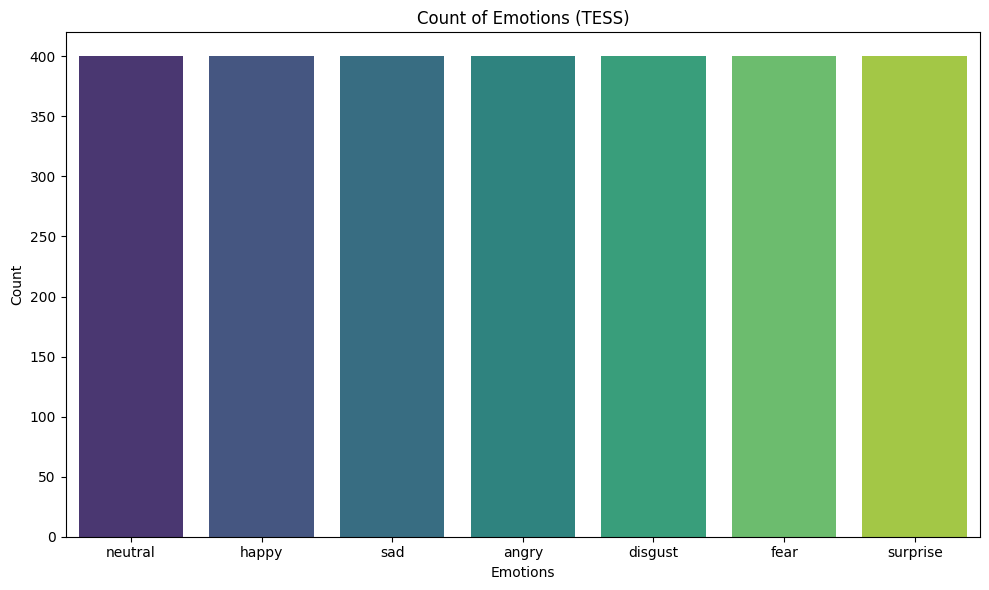

filenames emotions
0  /kaggle/input/toronto-emotional-speech-set-tes...     fear
1  /kaggle/input/toronto-emotional-speech-set-tes...     fear
2  /kaggle/input/toronto-emotional-speech-set-tes...     fear
3  /kaggle/input/toronto-emotional-speech-set-tes...     fear
4  /kaggle/input/toronto-emotional-speech-set-tes...     fear

In [11]:
tess_emotions = [get_tess_emotion(f) for f in tess_filenames]
tess_emotion_counts = Counter(tess_emotions)

# Emotion order for plotting
emotion_order = ['neutral', 'happy', 'sad', 'angry', 'disgust', 'fear', 'surprise']
tess_counts = [tess_emotion_counts.get(e, 0) for e in emotion_order]

# Print counts
print("Emotion Counts (TESS):")
for emotion in emotion_order:
    print(f"{emotion}: {tess_emotion_counts.get(emotion, 0)}")

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_order, y=tess_counts, palette="viridis")
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.title("Count of Emotions (TESS)")
plt.tight_layout()
plt.show()

# Create DataFrame
Tess_df = pd.DataFrame({
    'filenames': tess_filenames,
    'emotions': tess_emotions
})
Tess_df.head()


# <center> 🧩 Combine 3 Datasets </center>

---

## <center> **Creating a Unified Dataset for Emotion Recognition** </center>

In this section, we will merge three prominent emotion datasets:  
- **RAVDESS** (Ryerson Audio-Visual Database of Emotional Speech and Song)  
- **EmoDB** (Berlin Database of Emotional Speech)
- **TESS**


By combining these datasets, we aim to create a comprehensive and diverse dataset that will enhance the performance of our emotion recognition model.

---

### <center> Let's get started! </center>

In [12]:
# data_path = pd.concat([Ravdess_df,Emo_df], axis = 0)
# data_path.to_csv("data_path.csv",index=False)

# data_path.head()


# import pandas as pd

# # Assuming these three DataFrames already exist and have same column structure:
# # Ravdess_df, Emo_df, TESS_df

# # Concatenate all three datasets
# data_path = pd.concat([Ravdess_df, Emo_df, Tess_df], axis=0)

# # Reset index
# data_path.reset_index(drop=True, inplace=True)

# # Save to CSV
# data_path.to_csv("data_path.csv", index=False)

# # Display first few rows
# data_path.head()


In [13]:
fer_emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Normalization function
def normalize_emotion(label):
    mapping = {
        'anger': 'angry',
        'angry': 'angry',
        'happiness': 'happy',
        'happy': 'happy',
        'sadness': 'sad',
        'sad': 'sad',
        'fear': 'fear',
        'fearful': 'fear',
        'disgust': 'disgust',
        'disgusted': 'disgust',
        'neutral': 'neutral',
        'calm': 'neutral',  # Optional mapping
        'surprise': 'surprise',
        'surprised': 'surprise'
    }
    return mapping.get(label.strip().lower(), None)


In [14]:
# Apply to individual datasets
Ravdess_df['emotions'] = Ravdess_df['emotions'].apply(normalize_emotion)
Emo_df['emotions'] = Emo_df['emotions'].apply(normalize_emotion)
Tess_df['emotions'] = Tess_df['emotions'].apply(normalize_emotion)

In [15]:
# Combine them all
data_path = pd.concat([Ravdess_df, Emo_df, Tess_df], axis=0).reset_index(drop=True)

In [16]:
# ✅ Print emotion counts
import collections
emotion_counts = collections.Counter(data_path['emotions'])
print("✅ Final Merged Emotion Counts:")
for emotion in fer_emotions:
    print(f"{emotion}: {emotion_counts[emotion]}")

✅ Final Merged Emotion Counts:
angry: 719
disgust: 638
fear: 661
happy: 663
sad: 654
surprise: 592
neutral: 848


# <center> 🗑️ Drop Some Categories to Align Labels </center>

---

## <center> **Aligning Emotion Labels Across Datasets** </center>

To ensure consistency between the **RAVDESS**,**Tess** and **EmoDB** datasets, we will streamline the emotion categories by dropping labels that are not shared between the three datasets. 

This step is crucial for creating a **unified set of emotion labels**, which will improve the reliability and accuracy of our emotion recognition model.

---

### <center> Let's proceed to align the labels! </center>

In [17]:
# data_path = data_path[data_path["emotions"].str.contains("calm") == False]
# data_path = data_path[data_path["emotions"].str.contains("boredom") == False]
# data_path = data_path[data_path["emotions"].str.contains("ps") == False]
# data_path = data_path[data_path["emotions"].str.contains("surprise") == False]
# data_path['emotions'] = data_path['emotions'].replace({
#     'anger': 'angry',
#     'happiness': 'happy',
#     'sadness': 'sad',
#     'fearful' : 'fear'
# })
# data_path['emotions'].unique()
# Drop unwanted/unaligned emotions
data_path = data_path[data_path["emotions"].str.contains("calm") == False]
data_path = data_path[data_path["emotions"].str.contains("boredom") == False]
data_path = data_path[data_path["emotions"].str.contains("ps") == False]


# Standardize emotion names
data_path['emotions'] = data_path['emotions'].replace({
    'anger': 'angry',
    'happiness': 'happy',
    'sadness': 'sad',
    'fearful': 'fear'
})

# Save cleaned dataset
data_path.to_csv("data_path.csv", index=False)

In [18]:
# Show first 5 rows of the merged dataset
print(data_path.head())


                                           filenames  emotions
0  /kaggle/input/ravdess-emotional-speech-audio/a...  surprise
1  /kaggle/input/ravdess-emotional-speech-audio/a...   neutral
2  /kaggle/input/ravdess-emotional-speech-audio/a...   disgust
3  /kaggle/input/ravdess-emotional-speech-audio/a...   disgust
4  /kaggle/input/ravdess-emotional-speech-audio/a...   neutral


In [19]:
# Show first 5 rows of the merged dataset
print(data_path.tail())


                                              filenames  emotions
4770  /kaggle/input/toronto-emotional-speech-set-tes...  surprise
4771  /kaggle/input/toronto-emotional-speech-set-tes...  surprise
4772  /kaggle/input/toronto-emotional-speech-set-tes...  surprise
4773  /kaggle/input/toronto-emotional-speech-set-tes...  surprise
4774  /kaggle/input/toronto-emotional-speech-set-tes...  surprise


In [20]:
# Get emotion count
import collections

emotion_counts = collections.Counter(data_path['emotions'])
print("✅ Final Merged Emotion Counts:")
for emotion, count in emotion_counts.items():
    print(f"{emotion}: {count}")

✅ Final Merged Emotion Counts:
surprise: 592
neutral: 848
disgust: 638
fear: 661
sad: 654
happy: 663
angry: 719


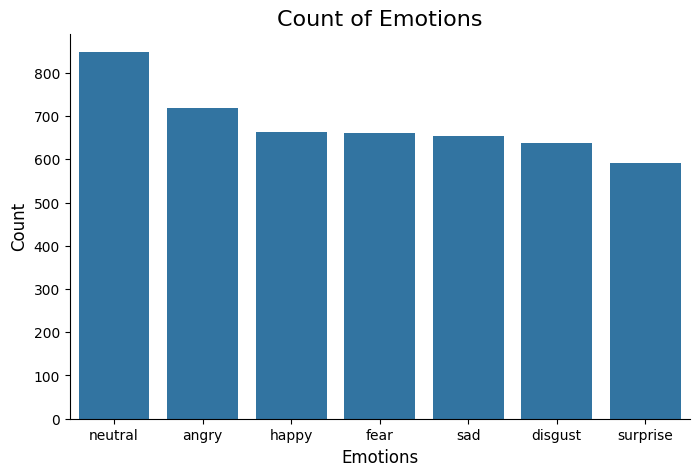

Counter({'neutral': 848, 'angry': 719, 'happy': 663, 'fear': 661, 'sad': 654, 'disgust': 638, 'surprise': 592})


In [21]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import collections


# # Set the title and labels
# plt.title('Count of Emotions', size=16)

# # Plot the count of emotions
# sns.countplot(x=data_path['emotions'])  # Use x= to specify the column

# # Add axis labels
# plt.ylabel('Count', size=12)
# plt.xlabel('Emotions', size=12)

# # Remove unnecessary spines
# sns.despine(top=True, right=True, left=False, bottom=False)

# # Display the plot
# plt.show()
# collections.Counter(data_path['emotions'])
# Plot emotion counts
plt.figure(figsize=(8,5))
plt.title('Count of Emotions', size=16)
sns.countplot(x=data_path['emotions'], order=data_path['emotions'].value_counts().index)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

# Print counts
print(collections.Counter(data_path['emotions']))

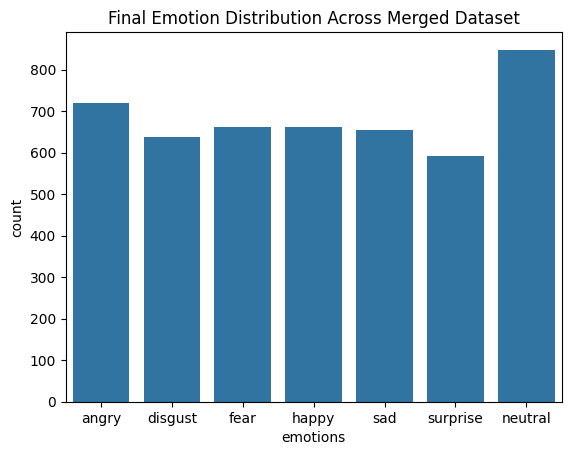

In [22]:
sns.countplot(data=data_path, x='emotions', order=fer_emotions)
plt.title("Final Emotion Distribution Across Merged Dataset")
plt.show()


# <center> 📊 Visualization of Audio Features for Emotion Analysis </center>

---

## <center> **Exploring Audio Characteristics Across Emotions** </center>

In this section, we delve into the audio features of our dataset to gain insights into how different emotions are represented in the audio signals. By visualizing waveforms, spectrograms, and Mel-Frequency Cepstral Coefficients (MFCCs), we aim to understand the unique characteristics of each emotion.

---

### <center> **Why Visualize Audio Features?** </center>

- **Waveform**: Provides a time-domain view of the audio signal, showing amplitude variations over time.
- **Spectrogram**: Offers a frequency-domain perspective, revealing how the intensity of different frequencies changes over time.
- **MFCCs**: Capture the spectral envelope of the audio, mimicking human perception and serving as a compact representation for machine learning models.

These visualizations help us:
- Identify patterns specific to each emotion.
- Validate the quality of the data.
- Gain intuition about how audio features can be used for emotion recognition.

---

### <center> **Visualization Workflow** </center>

For each emotion in the dataset, we perform the following steps:

1. **Select an Audio Sample**:
   - Filter the dataset for the target emotions.
   - Load the corresponding audio file using `librosa`.

2. **Generate Waveform**:
   - Plot the waveform to observe amplitude changes over time.
   - Example: A steady waveform with minimal fluctuations may indicate a calm or neutral emotion.

3. **Generate Spectrogram**:
   - Compute the Short-Time Fourier Transform (STFT) to analyze the frequency content of the audio.
   - Visualize the spectrogram to identify dominant frequencies and their temporal evolution.
   - Example: Voiced sounds appear as bright vertical bands, while silence or unvoiced sounds appear as dark regions.

4. **Generate MFCCs**:
   - Extract MFCCs to represent the spectral envelope of the audio.
   - Visualize the MFCCs to observe how the coefficients vary over time.
   - Example: MFCCs provide a compact representation that captures the most relevant features for emotion classification.

5. **Play the Audio**:
   - Use the `Audio` function to listen to the selected sample and correlate the sound with its visual representation.

In [23]:
# def create_waveplot(data, sr, e):
#     plt.figure(figsize=(10, 3))
#     plt.title('Waveform for audio with emotion {}'.format(e), size=15)
#     librosa.display.waveshow(data, sr=sr)
#     plt.show()

# def create_spectrogram(data, sr, e):
#     # stft performs Fourier transform.
#     X = librosa.stft(data)
#     Xdb = librosa.amplitude_to_db(abs(X))
#     plt.figure(figsize=(12, 3))
#     plt.title('Spectrogram for audio with emotion {}'.format(e), size=15)
#     librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
#     plt.colorbar()
# def create_mfcc(data, sr, e):
#     mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13)
#     plt.figure(figsize=(12, 3))
#     plt.title('Mel-frequency cepstral coefficient for audio with emotion {}'.format(e), size=15)
#     librosa.display.specshow(mfcc, x_axis='time')
#     plt.ylabel('MFCC')
#     plt.colorbar()

import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

# Helper function: Plot Waveform
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveform - Emotion: {e}', size=14)
    librosa.display.waveshow(data, sr=sr)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

# Helper function: Plot Spectrogram
def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(10, 3))
    plt.title(f'Spectrogram - Emotion: {e}', size=14)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
    plt.colorbar(format="%+2.0f dB")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.show()

# Helper function: Plot MFCCs
def create_mfcc(data, sr, e):
    mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13)
    plt.figure(figsize=(10, 3))
    plt.title(f'MFCC - Emotion: {e}', size=14)
    librosa.display.specshow(mfcc, x_axis='time', sr=sr)
    plt.ylabel('MFCC Coefficients')
    plt.colorbar()
    plt.show()

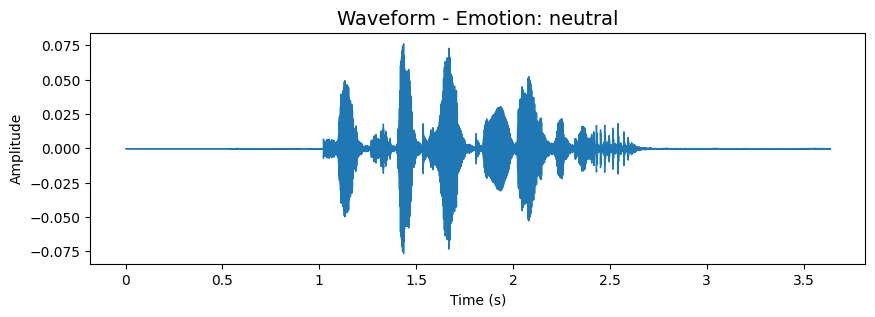

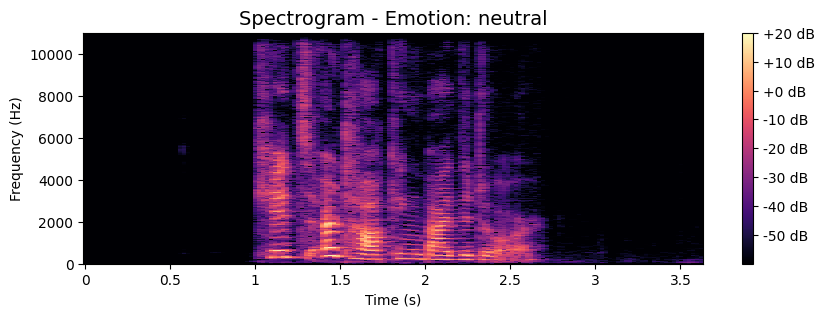

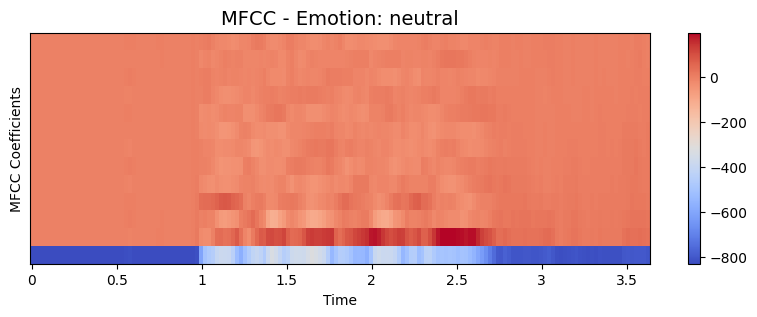

In [24]:
# emotion = 'neutral'
# path = np.array(data_path.filenames[data_path.emotions == emotion])[1]
# data, sampling_rate = librosa.load(path)
# create_waveplot(data, sampling_rate, emotion)
# create_spectrogram(data, sampling_rate, emotion)
# create_mfcc(data, sampling_rate, emotion)
# Audio(path)

# Pick an emotion
emotion = 'neutral'

# Select a sample path for the emotion
sample_path = np.array(data_path.filenames[data_path.emotions == emotion])[0]  # first file

# Load the audio
data, sampling_rate = librosa.load(sample_path)

# Display waveform, spectrogram, MFCCs
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data, sampling_rate, emotion)

# Play audio
Audio(sample_path)

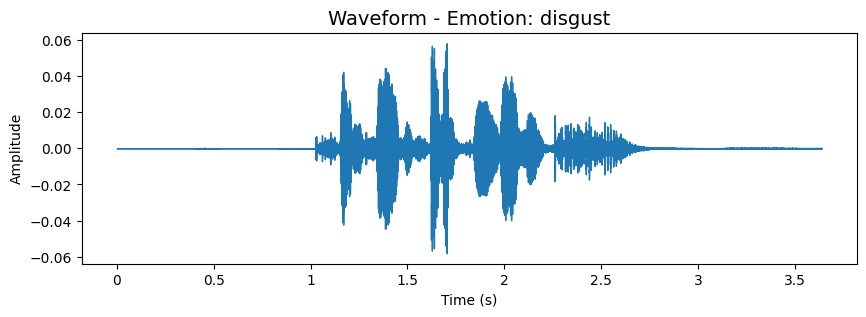

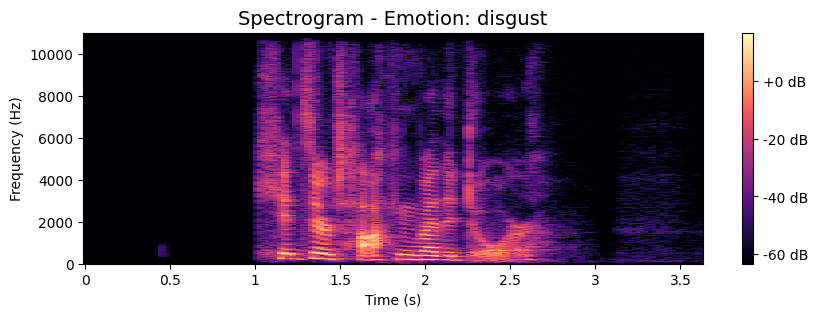

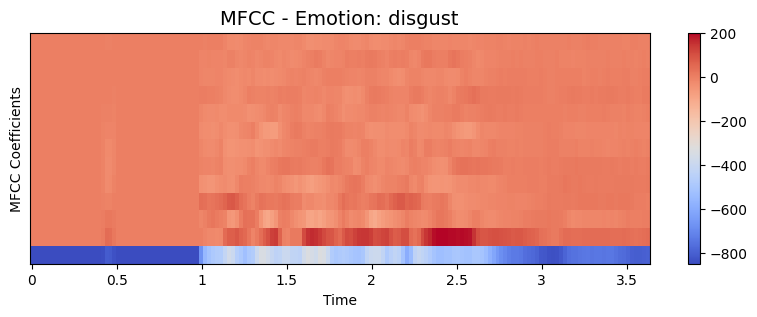

In [25]:
emotion = 'disgust'
path = np.array(data_path.filenames[data_path.emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data, sampling_rate, emotion)
Audio(path)

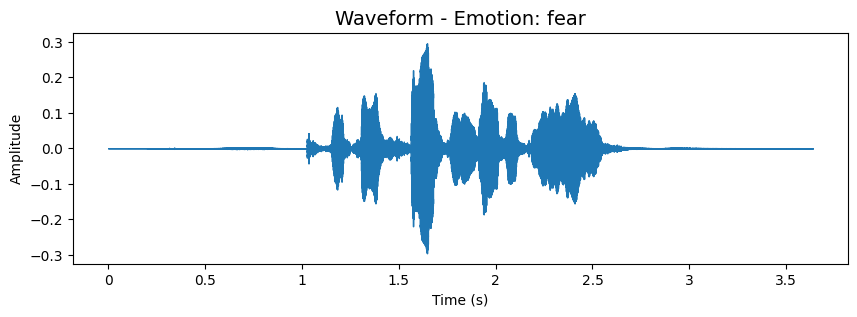

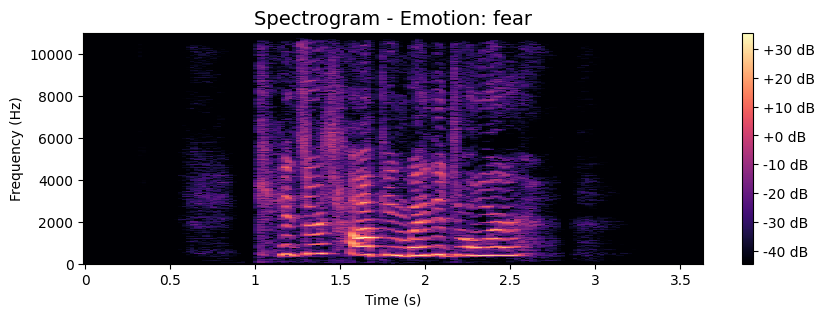

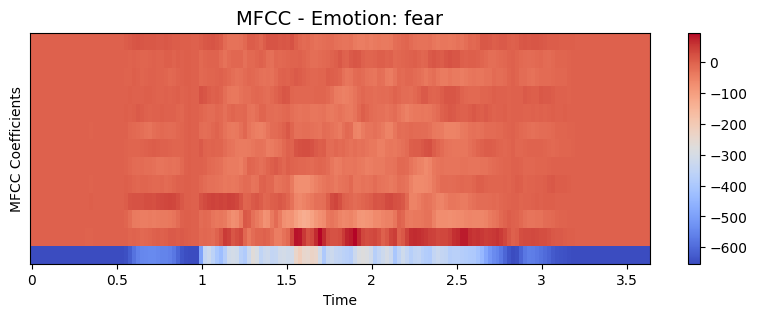

In [26]:
emotion = 'fear'
path = np.array(data_path.filenames[data_path.emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data, sampling_rate, emotion)
Audio(path)

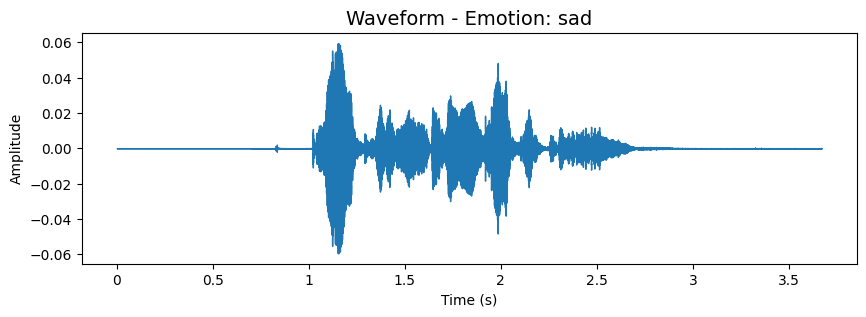

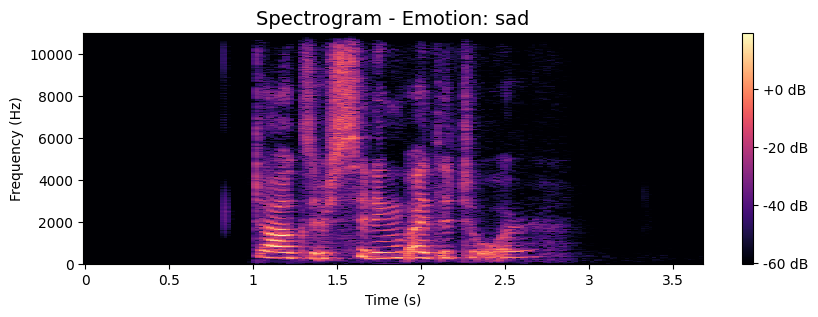

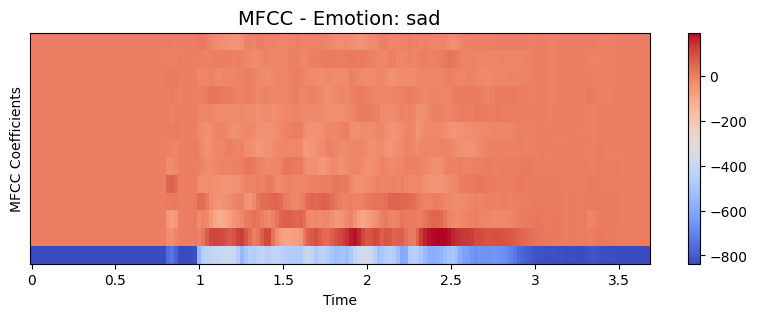

In [27]:
emotion = 'sad'
path = np.array(data_path.filenames[data_path.emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data, sampling_rate, emotion)
Audio(path)

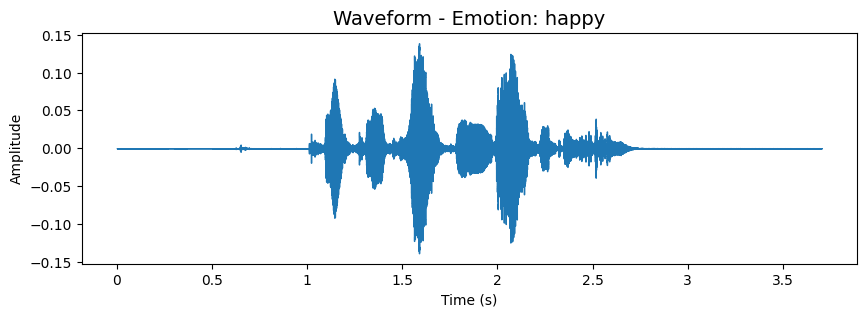

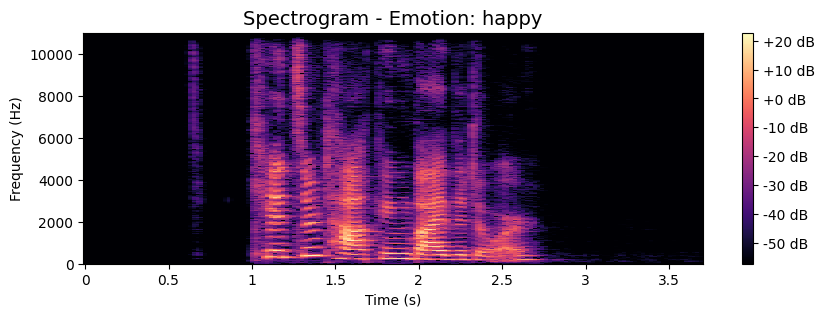

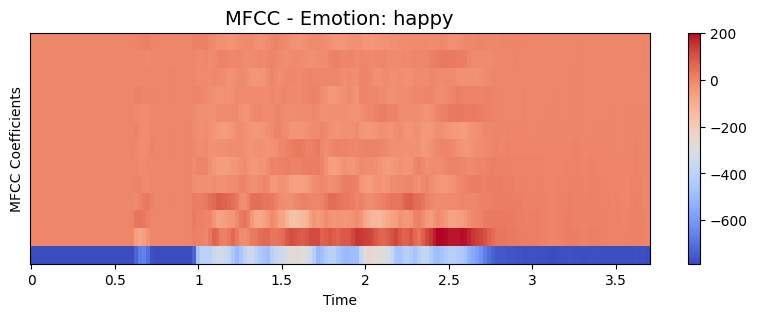

In [28]:
emotion = 'happy'
path = np.array(data_path.filenames[data_path.emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data, sampling_rate, emotion)
Audio(path)

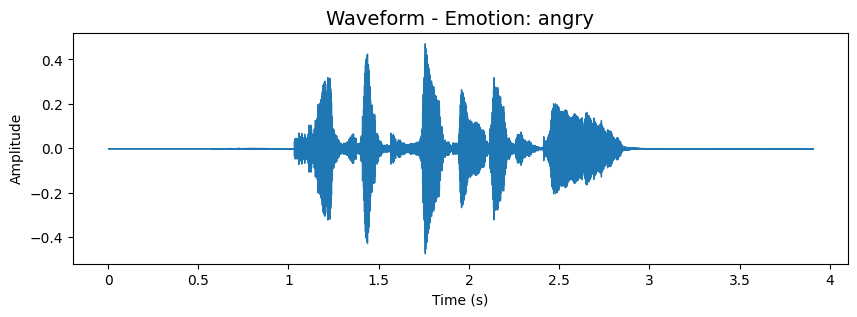

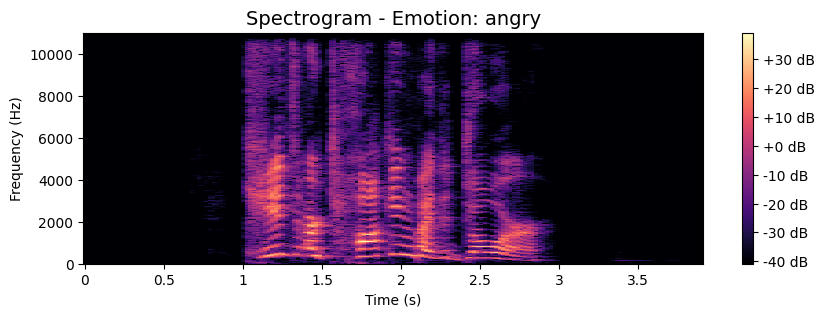

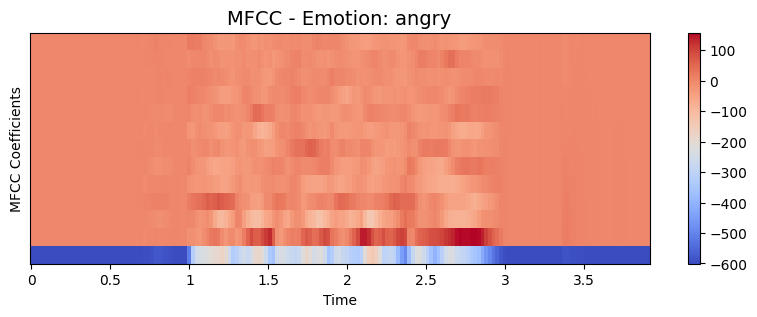

In [29]:
emotion = 'angry'
path = np.array(data_path.filenames[data_path.emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data, sampling_rate, emotion)
Audio(path)

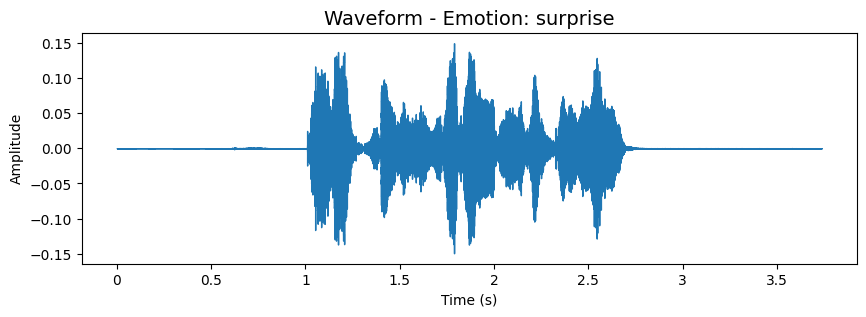

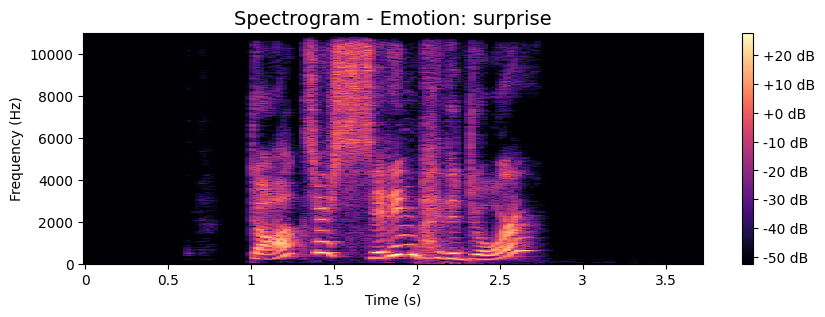

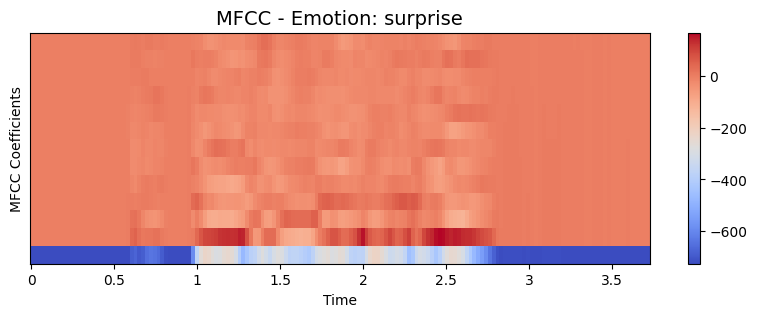

In [30]:
emotion = 'surprise'
path = np.array(data_path.filenames[data_path.emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
create_mfcc(data, sampling_rate, emotion)
Audio(path)

# <center> 🎵 Data Augmentations: Enhancing Audio Diversity </center>

---

## <center> **Exploring Augmentation Techniques** </center>

In this section, we explore various data augmentation techniques to enhance the diversity of our audio dataset. These augmentations simulate real-world variations in audio signals, making our emotion recognition model more robust and generalizable.

Each augmentation is visualized and explained below:

---

### <center> **1. Normal Sound 🎤** </center>

- Represents the original, unmodified audio signal.
- No transformations are applied.
- This serves as the baseline for comparison with augmented versions.

#### **Key Characteristics**:
- Clean and unaltered waveform.
- Captures the natural characteristics of the audio.

---

### <center> **2. Noise Injection 🔊⚡** </center>

- Adds random background noise to the audio signal.
- Simulates real-world scenarios where background noise (e.g., traffic, crowd chatter) might be present.

#### **Why Use It?**
- Helps the model generalize to noisy environments.
- Improves robustness against imperfect audio inputs.

---

### <center> **3. Time Stretching ⏩⏪** </center>

- Stretches or compresses the audio signal without altering its pitch.
- Simulates variations in speaking speed (e.g., faster or slower speech).

#### **Why Use It?**
- Captures temporal variations in speech patterns.
- Useful for handling speakers who talk at different speeds.

---

### <center> **4. Pitch Shifting 🎶↕️** </center>

- Shifts the pitch of the audio signal up or down by a specified number of semitones.
- Simulates variations in vocal tone (e.g., higher-pitched or lower-pitched voices).

#### **Why Use It?**
- Accounts for differences in speaker gender, age, or emotional intensity.
- Enhances the model's ability to recognize emotions across diverse vocal tones.


🔹 Original Audio


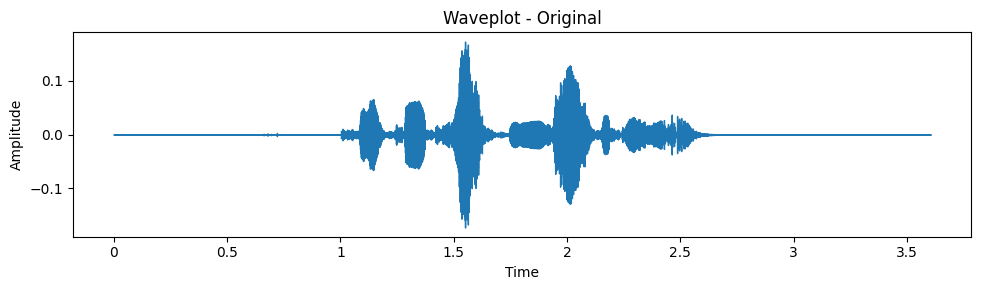

🔹 Noise Injected Audio


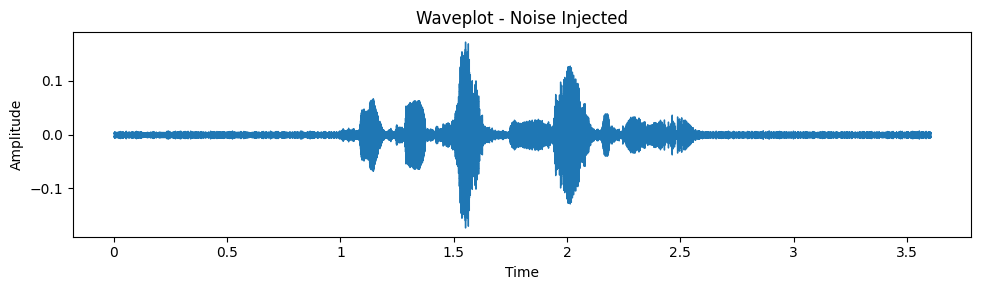

🔹 Time-Stretched Audio


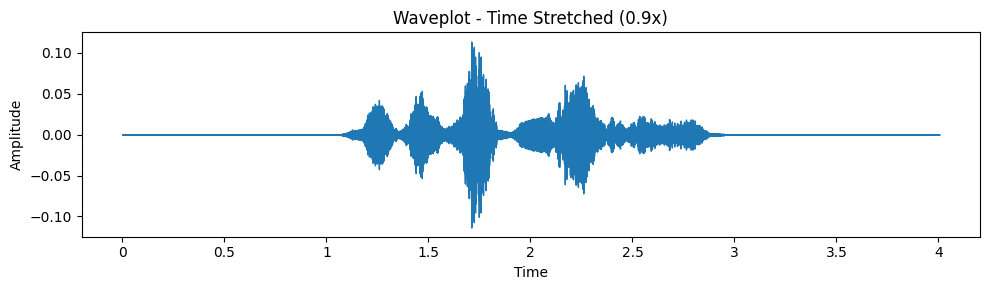

🔹 Pitch Shifted Audio


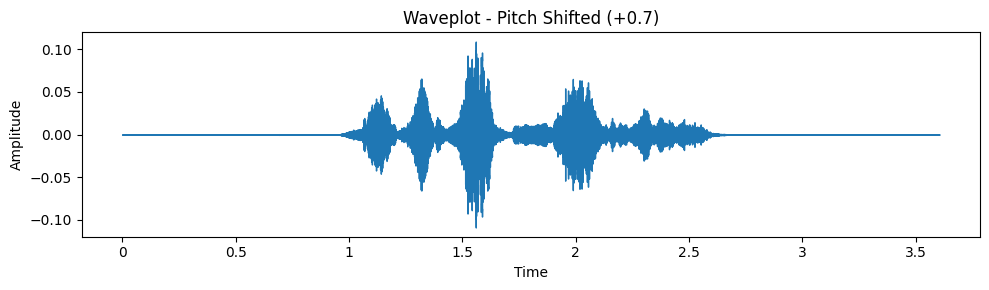

In [31]:
# import numpy as np
# import librosa
# import matplotlib.pyplot as plt
# from IPython.display import Audio

# # Define augmentation functions
# def noise(data, noise_rate=0.05):
#     noise_amp = noise_rate * np.random.uniform() * np.amax(data)
#     data = data + noise_amp * np.random.normal(size=data.shape[0])
#     return data

# def stretch(data, rate=0.9):
#     return librosa.effects.time_stretch(data, rate=rate)

# def pitch_shift(data, sampling_rate, pitch_factor=0.7):
#     return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

# # Load an example audio file
# path = np.array(data_path.filenames)[2]
# data, sample_rate = librosa.load(path)

# # Apply augmentations
# x_stretched = stretch(data)
# x_pitch_shifted = pitch_shift(data, sample_rate)

import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

# ✅ Augmentation Functions
def noise(data, noise_rate=0.05):
    noise_amp = noise_rate * np.random.uniform() * np.amax(data)
    noisy_data = data + noise_amp * np.random.normal(size=data.shape[0])
    return noisy_data

def stretch(data, rate=0.9):
    return librosa.effects.time_stretch(data, rate=rate)

def pitch_shift(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

# ✅ Visualization Functions
def create_waveplot(data, sr, title):
    plt.figure(figsize=(10, 3))
    librosa.display.waveshow(data, sr=sr)
    plt.title(f"Waveplot - {title}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

# ✅ Load an audio file from dataset
emotion = 'happy'  # You can choose any emotion present in merged data
path = np.array(data_path.filenames[data_path.emotions == emotion])[0]
data, sample_rate = librosa.load(path)

# ✅ 1. Normal Audio
print("🔹 Original Audio")
create_waveplot(data, sample_rate, "Original")
Audio(data, rate=sample_rate)

# ✅ 2. Noise Injected
noisy_data = noise(data)
print("🔹 Noise Injected Audio")
create_waveplot(noisy_data, sample_rate, "Noise Injected")
Audio(noisy_data, rate=sample_rate)

# ✅ 3. Time Stretched
stretched_data = stretch(data)
print("🔹 Time-Stretched Audio")
create_waveplot(stretched_data, sample_rate, "Time Stretched (0.9x)")
Audio(stretched_data, rate=sample_rate)

# ✅ 4. Pitch Shifted
pitch_data = pitch_shift(data, sample_rate)
print("🔹 Pitch Shifted Audio")
create_waveplot(pitch_data, sample_rate, "Pitch Shifted (+0.7)")
Audio(pitch_data, rate=sample_rate)


## <center> **1. Normal Sound 🎤** </center>

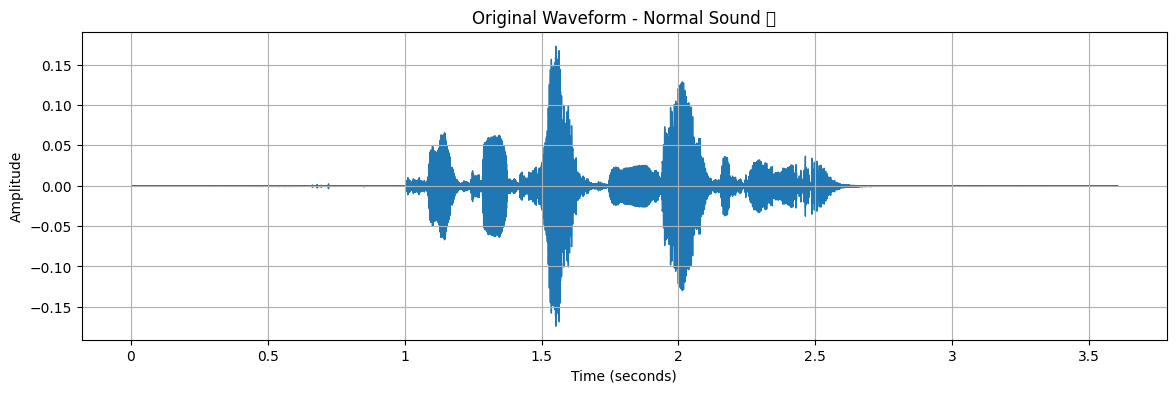

In [32]:
# 1. Normal Sound 🎤
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=data, sr=sample_rate)
plt.title("Original Waveform - Normal Sound 🎤")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Play the original audio
Audio(data, rate=sample_rate)

## <center> **2. Noise Injection 🔊⚡** </center>

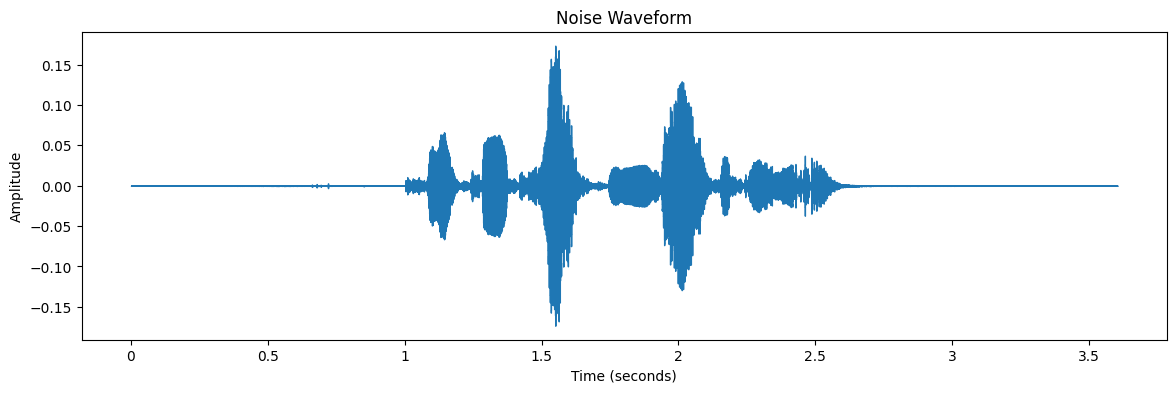

In [33]:
x = noise(data)

# Load the audio file
data, sample_rate = librosa.load(path)

# Plot the waveform using waveshow
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=data, sr=sample_rate)
plt.title("Noise Waveform")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

Audio(x, rate=sample_rate)

## <center> **3. Time Stretching ⏩⏪** </center>

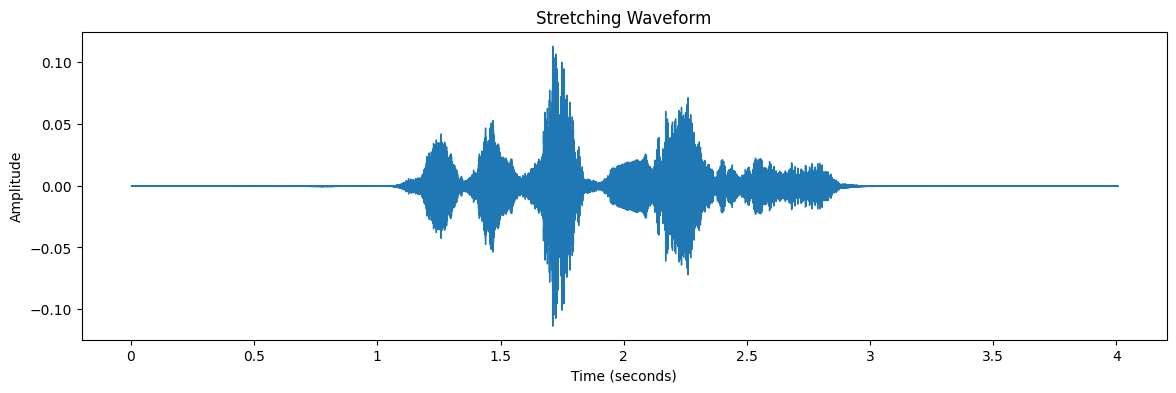

In [34]:
# x = stretch(data)

# # Load the audio file
# data, sample_rate = librosa.load(path)

# # Plot the stretched waveform
# plt.figure(figsize=(14, 4))
# librosa.display.waveshow(y=x_stretched, sr=sample_rate)
# plt.title("Stretching Waveform")
# plt.xlabel("Time (seconds)")
# plt.ylabel("Amplitude")
# plt.show()

# Audio(x, rate=sample_rate)

x = stretch(data)  # Apply time stretching

# Plot the stretched waveform using x (not x_stretched)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)  # ✅ fixed
plt.title("Stretching Waveform")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

Audio(x, rate=sample_rate)


## <center> **4. Pitch Shifting 🎶↕️** </center>

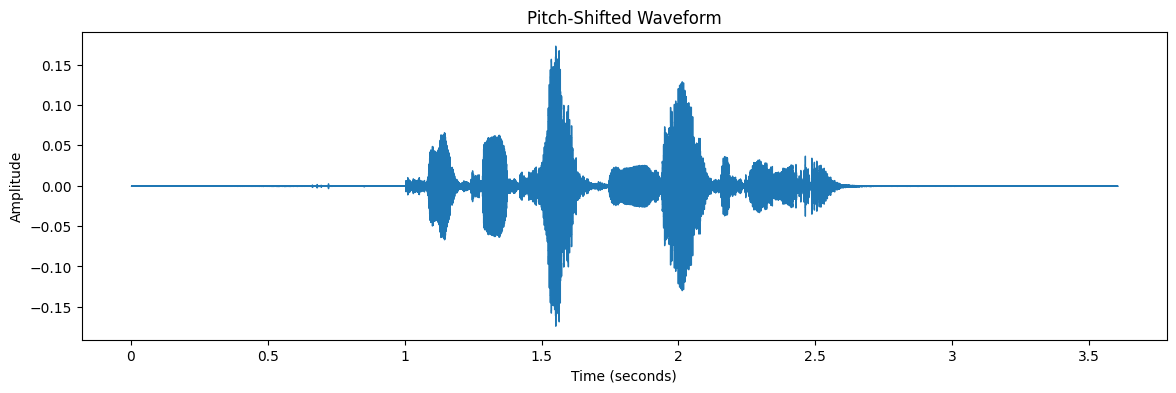

In [35]:
x_pitch_shifted = pitch_shift(data, sample_rate)

# Load the audio file
data, sample_rate = librosa.load(path)

# Plot the waveform using waveshow
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=data, sr=sample_rate)
plt.title("Pitch-Shifted Waveform")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

Audio(x_pitch_shifted, rate=sample_rate)

In [36]:



# 📌 Constants
FIXED_LENGTH = 5120  # Adjust this based on your dataset

# 📌 Feature Extraction Functions
def zcr(data, frame_length=2048, hop_length=512):
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc_feature = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13)
    return np.squeeze(mfcc_feature.T) if not flatten else np.ravel(mfcc_feature.T)

# 📌 Combine All Features
def extract_features(data, sr, frame_length=2048, hop_length=512):
    data = librosa.util.fix_length(data, size=FIXED_LENGTH)
    zcr_feature = zcr(data, frame_length, hop_length)
    rmse_feature = rmse(data, frame_length, hop_length)
    mfcc_feature = mfcc(data, sr, frame_length, hop_length)
    return np.hstack((zcr_feature, rmse_feature, mfcc_feature))

# 📌 Time Stretch Function (speed < 1.0 = slower)
def stretch(data, rate=0.9):
    return librosa.effects.time_stretch(data, rate=rate)




In [37]:

def get_features(path):
    # Load audio
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # Ensure fixed length
    data = librosa.util.fix_length(data, size=FIXED_LENGTH)

    # Normal
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)

    # Noise augmentation
    noise_data = noise(data)
    noise_data = librosa.util.fix_length(noise_data, size=FIXED_LENGTH)
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2))

    # Time-stretching
    stretched_data = stretch(data)
    stretched_data = librosa.util.fix_length(stretched_data, size=FIXED_LENGTH)
    res3 = extract_features(stretched_data, sample_rate)
    result = np.vstack((result, res3))

    # Pitch shifting
    pitched_data = pitch_shift(data, sample_rate)
    pitched_data = librosa.util.fix_length(pitched_data, size=FIXED_LENGTH)
    res4 = extract_features(pitched_data, sample_rate)
    result = np.vstack((result, res4))

    # Combined pitch + noise
    pitch_noise_data = noise(pitched_data)
    pitch_noise_data = librosa.util.fix_length(pitch_noise_data, size=FIXED_LENGTH)
    res5 = extract_features(pitch_noise_data, sample_rate)
    result = np.vstack((result, res5))

    return result


In [38]:


X = []
Y = []

for path, emotion in zip(data_path.filenames, data_path.emotions):
    features = get_features(path)  # This returns 5 versions (normal + 4 augmentations)

    for feature_vector in features:
        X.append(feature_vector)
        Y.append(emotion)

print("Total data points (X):", len(X))
print("Total labels (Y):", len(Y))
print("Original files:", data_path.filenames.shape)


Total data points (X): 23875
Total labels (Y): 23875
Original files: (4775,)


In [39]:

import pandas as pd

# Save the features and labels
Features = pd.DataFrame(X)
Features['labels'] = Y

# Export to CSV
Features.to_csv('features.csv', index=False)
print("Sample features:\n", Features.head(10))


Sample features:
           0         1         2         3         4         5         6  \
0  0.343750  0.479492  0.573730  0.458008  0.375488  0.301758  0.269043   
1  0.240723  0.370117  0.484375  0.449219  0.405273  0.346191  0.297363   
2  0.309082  0.440918  0.550293  0.480957  0.402344  0.334961  0.285156   
3  0.304199  0.427246  0.540039  0.471191  0.387207  0.333008  0.282227   
4  0.279297  0.403320  0.508301  0.463379  0.380371  0.323730  0.281738   
5  0.437500  0.659668  0.862305  0.878906  0.865234  0.847168  0.845703   
6  0.263672  0.388672  0.519043  0.507324  0.507324  0.511230  0.504883   
7  0.314453  0.436523  0.564453  0.499023  0.472168  0.444824  0.413086   
8  0.302246  0.432129  0.559082  0.503418  0.480957  0.447266  0.421875   
9  0.260254  0.389160  0.512207  0.497559  0.477539  0.451172  0.450195   

          7         8         9  ...        156        157        158  \
0  0.255371  0.251465  0.189453  ...  -6.893378 -25.650131 -10.611105   
1  0.27343

Chuẩn bị dữ liệu¶
Sau khi đã trích xuất đặc điểm và tăng cường dữ liệu, bước tiếp theo ta sẽ tiếp hành chuẩn hóa và phân chia tập dữ liệu
Ở đây chia là 3 tập là : test, validation và train.
Hàm OneHotEncoder để mã hóa các giá trị của nhãn.

In [40]:
# X = Features.iloc[:, :-1].values
# Y = Features['labels'].values

# # Encode labels for multi-class classification
# encoder = OneHotEncoder()
# Y = encoder.fit_transform(np.array(Y).reshape(-1, 1)).toarray()
# encoder.categories_
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Split features and labels
X = Features.iloc[:, :-1].values  # All columns except 'labels'
Y = Features['labels'].values     # Only the 'labels' column

# Encode the labels to one-hot vectors
encoder = OneHotEncoder()
Y_encoded = encoder.fit_transform(np.array(Y).reshape(-1, 1)).toarray()

# Optional: To check which categories were encoded
print("Label categories:", encoder.categories_)
print("X shape:", X.shape)
print("Y shape (one-hot):", Y_encoded.shape)


Label categories: [array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype=object)]
X shape: (23875, 165)
Y shape (one-hot): (23875, 7)


# 80/10/10

In [41]:

from sklearn.model_selection import train_test_split

# Use original 1D labels before encoding
Y_labels = Features['labels'].values

# Split into 90% (train + val) and 10% test
x_train_val, x_test, y_train_val_labels, y_test_labels = train_test_split(
    X, Y_labels, test_size=0.1, random_state=30, shuffle=True, stratify=Y_labels
)

# Further split 90% into 80% train and 10% val
x_train, x_val, y_train_labels, y_val_labels = train_test_split(
    x_train_val, y_train_val_labels, test_size=0.1111, random_state=30, shuffle=True, stratify=y_train_val_labels
)

# One-hot encode after splitting
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y_train = encoder.fit_transform(np.array(y_train_labels).reshape(-1, 1)).toarray()
y_val = encoder.transform(np.array(y_val_labels).reshape(-1, 1)).toarray()
y_test = encoder.transform(np.array(y_test_labels).reshape(-1, 1)).toarray()

# Final check
print("Shapes:")
print("Training set:", x_train.shape, y_train.shape)
print("Validation set:", x_val.shape, y_val.shape)
print("Testing set:", x_test.shape, y_test.shape)


Shapes:
Training set: (19099, 165) (19099, 7)
Validation set: (2388, 165) (2388, 7)
Testing set: (2388, 165) (2388, 7)


In [42]:
# # Standard scaler
# scaler = StandardScaler()

# x_train = scaler.fit_transform(x_train)
# x_val=scaler.transform(x_val)
# x_test = scaler.transform(x_test)

# x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [43]:
# # Use MinMaxScaler for normalization
# scaler = MinMaxScaler()
# x_train = scaler.fit_transform(x_train)
# x_val = scaler.transform(x_val)
# x_test = scaler.transform(x_test)

# x_train.shape, y_train.shape, x_test.shape, y_test.shape

from sklearn.preprocessing import MinMaxScaler

# Use MinMaxScaler for normalization
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)   # Fit and transform only on training data
x_val = scaler.transform(x_val)           # Use same scaler to transform val data
x_test = scaler.transform(x_test)         # Use same scaler to transform test data

# Shape check
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((19099, 165), (19099, 7), (2388, 165), (2388, 7))

# Model

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Dropout, LSTM, Dense

# Reshape the data to include the channel dimension
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], 1)

# Define the model
model = Sequential()

# First Conv1D Block
model.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Second Conv1D Block
model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Third Conv1D Block
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# LSTM Layers
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(128))
model.add(Dropout(0.3))

# Fully Connected Dense Layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output Layer (7 classes)
model.add(Dense(7, activation='softmax'))  # 7 emotions

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


I0000 00:00:1768468042.844958      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 165, 1024)      │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 83, 1024)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 83, 1024)       │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 83, 1024)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 83, 512)        │     2,621,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 42, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 42, 512)        │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 42, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 42, 256)        │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 21, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 21, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 21, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 21, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 21, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,778,247 (14.41 MB)

 Trainable params: 3,774,663 (14.40 MB)

 Non-trainable params: 3,584 (14.00 KB)

In [45]:

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)

# checkpoint = tf.keras.callbacks.ModelCheckpoint(
    # 'best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=30,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/30


I0000 00:00:1768468050.121910      92 cuda_dnn.cc:529] Loaded cuDNN version 91002


299/299 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.3916 - loss: 1.5815 - val_accuracy: 0.1508 - val_loss: 2.3199 - learning_rate: 0.0010
Epoch 2/30
299/299 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.6193 - loss: 1.0148 - val_accuracy: 0.1997 - val_loss: 2.1349 - learning_rate: 0.0010
Epoch 3/30
299/299 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.6672 - loss: 0.8781 - val_accuracy: 0.5515 - val_loss: 1.2451 - learning_rate: 0.0010
Epoch 4/30
299/299 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.6962 - loss: 0.8133 - val_accuracy: 0.6549 - val_loss: 0.9341 - learning_rate: 0.0010
Epoch 5/30
299/299 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.7078 - loss: 0.7626 - val_accuracy: 0.5716 - val_loss: 1.1276 - learning_rate: 0.0010
Epoch 6/30
299/299 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.7262 - loss: 0.7309 - val_accuracy: 0.6855 - val_loss: 0.8470 - learning_rate: 0.0010
Epoch 7/30
299/299 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.7411 - loss: 0.6914

In [46]:
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8626 - loss: 0.3677
test loss, test acc: [0.38045328855514526, 0.8605527877807617]


In [47]:
import os
model_name = 'SER_model_0.7.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

Save model and weights at /kaggle/working/saved_models/SER_model_0.7.h5 


In [48]:
import os

model_name = 'SER_model_0.7.keras'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('✅ Model saved in .keras format at:', model_path)


✅ Model saved in .keras format at: /kaggle/working/saved_models/SER_model_0.7.keras


In [49]:
# Predict based on the test set
pred_test = model.predict(x_test)

y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [50]:
pred_test=model.predict(x_test)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [51]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(20)

Predicted Labels Actual Labels
0              fear          fear
1           neutral       disgust
2             happy         happy
3              fear          fear
4               sad           sad
5          surprise      surprise
6           neutral       neutral
7          surprise      surprise
8              fear          fear
9           disgust       disgust
10            angry         angry
11              sad           sad
12            happy         happy
13         surprise      surprise
14            angry         angry
15             fear          fear
16          neutral       neutral
17         surprise      surprise
18            happy         happy
19          neutral         angry

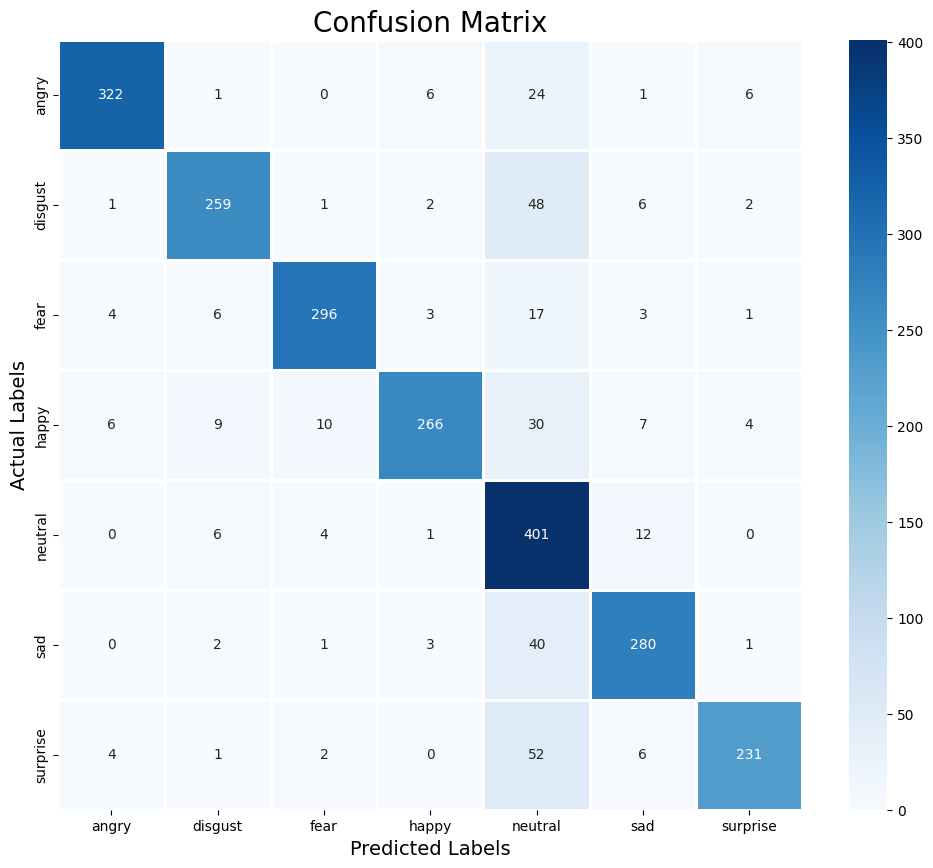

In [52]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Classification Report:

              precision    recall  f1-score   support

       Angry       1.00      0.14      0.25      2388
       Happy       0.00      0.00      0.00         0
         Sad       0.00      0.00      0.00         0
     Fearful       0.00      0.00      0.00         0
     Disgust       0.00      0.00      0.00         0
   Surprised       0.00      0.00      0.00         0
     Neutral       0.00      0.00      0.00         0

    accuracy                           0.14      2388
   macro avg       0.14      0.02      0.04      2388
weighted avg       1.00      0.14      0.25      2388



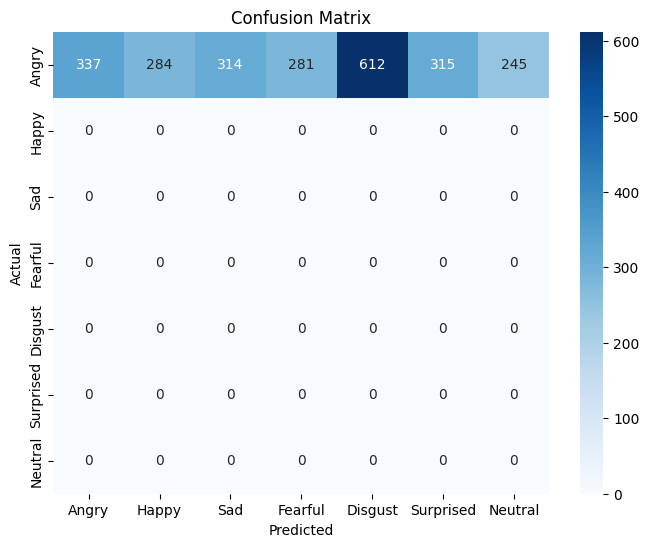

In [53]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have your test data in X_test and y_test

# If y_test is one-hot encoded, convert it to label form
y_true = np.argmax(y_test, axis=1)

# Predict with your model
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Get the list of emotion labels (update this based on your actual class order)
emotion_labels = ['Angry', 'Happy', 'Sad', 'Fearful', 'Disgust', 'Surprised', 'Neutral']

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=emotion_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
